# Business Understanding

# Data Understanding

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [187]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
file_path = '/content/drive/MyDrive/KP/data_kp_habibi.xlsx'
df = pd.read_excel(file_path)

In [189]:
df.head()

,tanggal,produk,stok_terpakai
0,2025-08-01,mie_ayam,115
1,2025-08-02,mie_ayam,123
2,2025-08-03,mie_ayam,120
3,2025-08-04,mie_ayam,76
4,2025-08-05,mie_ayam,79


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tanggal        92 non-null     datetime64[ns]
 1   produk         92 non-null     object        
 2   stok_terpakai  92 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.3+ KB


In [191]:
# Mengonversi kolom tanggal ke format datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

In [192]:
# Select only relevant columns (tanggal and stok_terpakai)
data = df[['tanggal', 'stok_terpakai']]

In [193]:
# Sort the data by 'tanggal' to ensure it's in chronological order
data = data.sort_values('tanggal')

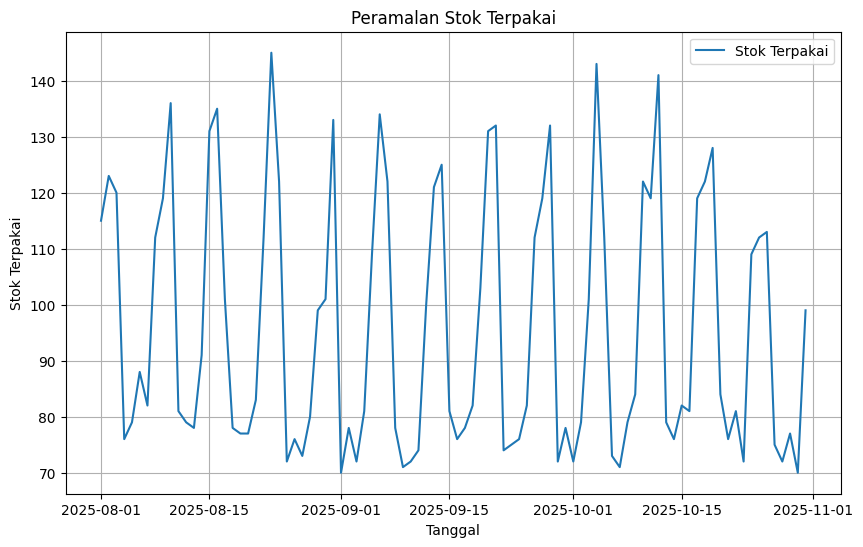

In [194]:
# Plot the data to visualize the stock usage
plt.figure(figsize=(10, 6))
plt.plot(data['tanggal'], data['stok_terpakai'], label='Stok Terpakai')
plt.xlabel('Tanggal')
plt.ylabel('Stok Terpakai')
plt.title('Peramalan Stok Terpakai')
plt.grid(True)
plt.legend()
plt.show()

# Data Preparation

In [195]:
# Normalization of the 'stok_terpakai' column
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['stok_terpakai']])

In [196]:
# Convert data into sequences for LSTM (X, y)
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

# Define sequence length (number of days to look back)
seq_length = 7  # Increase the sequence length for better context

In [197]:
# Create sequences
X, y = create_sequences(data_scaled, seq_length)

In [198]:
# Reshape X to be compatible with LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [199]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


# Modeling

In [200]:
# Build the LSTM model
model = Sequential()

In [201]:
# Adding LSTM Layer with Dropout for regularization
model.add(LSTM(units=256, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [202]:
# Adding another LSTM layer with Dropout
model.add(LSTM(units=128, activation='relu', return_sequences=False))
model.add(Dropout(0.3))

In [203]:
# Output layer
model.add(Dense(1))

In [204]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [205]:
# Define the TensorBoard callback
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1)

# Evaluation

In [206]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - loss: 0.2122 - val_loss: 0.1259
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1690 - val_loss: 0.0918
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1312 - val_loss: 0.0630
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1063 - val_loss: 0.0929
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1103 - val_loss: 0.1172
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1258 - val_loss: 0.0720
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0964 - val_loss: 0.0598
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1005 - val_loss: 0.0613
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0983 - val_loss: 0.0649
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1024 - val_loss: 0.0642
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1100 - val_loss: 0.0590
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0999 - val_l

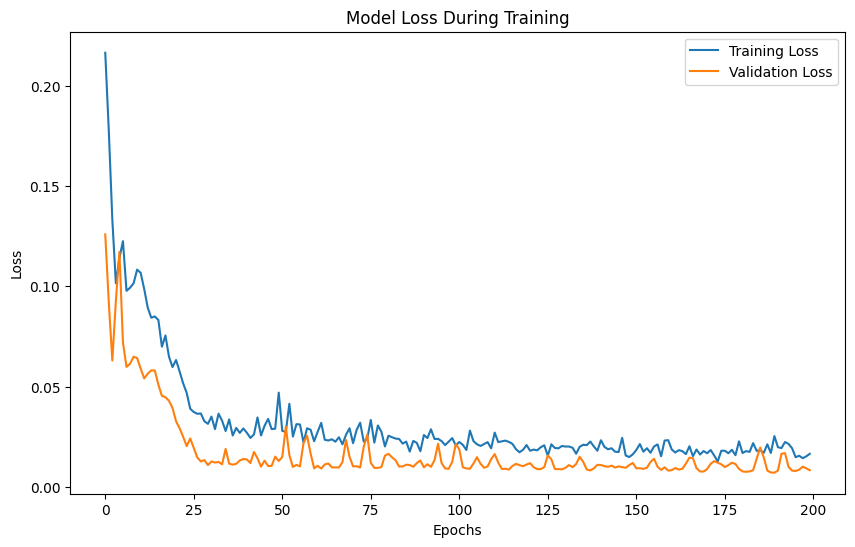

In [207]:
# Plot training & validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss During Training')
plt.legend()
plt.show()

In [208]:
# Make predictions on the test data
y_pred = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


In [209]:
# Inverse transform predictions and actual values to get them back to original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [210]:
# Evaluate the model using MAE and MSE
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2 = 1 - (np.sum((y_test_rescaled - y_pred_rescaled)**2) / np.sum((y_test_rescaled - np.mean(y_test_rescaled))**2))

In [211]:
# Print evaluation metrics
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')

MAE: 5.579943937413833
MSE: 46.351167273820664
R-squared: 0.8798869539997294


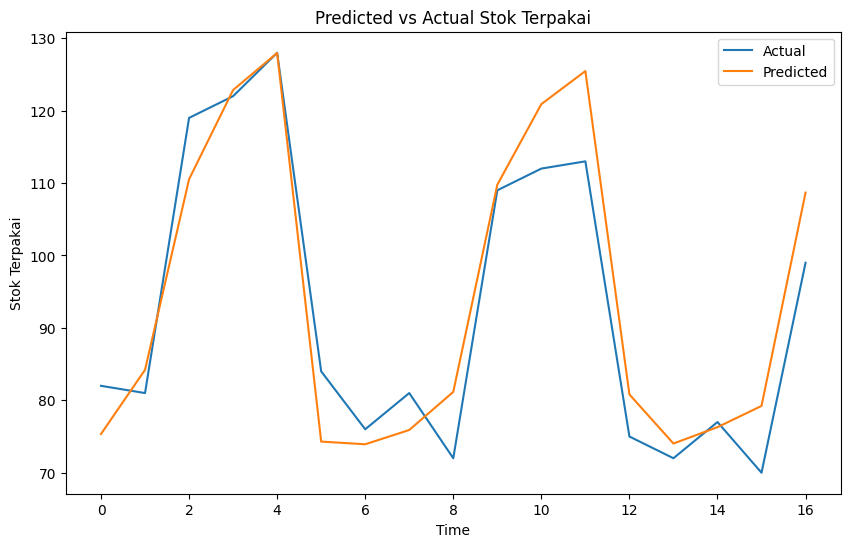

In [212]:

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stok Terpakai')
plt.title('Predicted vs Actual Stok Terpakai')
plt.legend()
plt.show()

# Deployment

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
        Date  Predicted Stok Terpakai
0 2025-11-01               108.683769
1 2025-11-02               119.409882
2 2025-11-03               124.963226
3 2025-11-04                73.961983
4 2025-11-05                73.895294
5 2025-11-06                75.267067
6 2025-11-07                79.600273


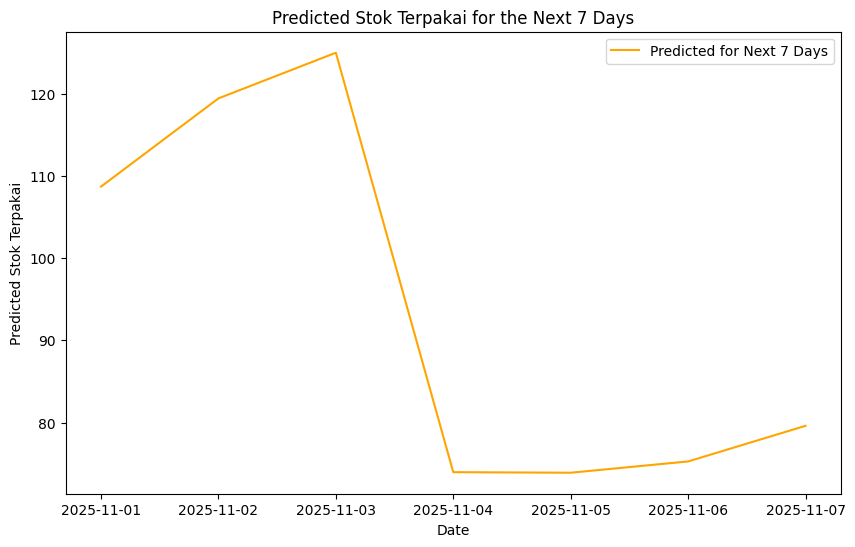

In [214]:
# Fungsi untuk memprediksi 'n' hari ke depan
def predict_n_days(n_days):
    # Ambil sequence terakhir dari set test
    last_sequence = X_test[-1, :, :]  # Ambil sequence terakhir dari data test

    # Pastikan sequence memiliki panjang yang benar (seq_length)
    last_sequence = last_sequence.reshape((1, seq_length, 1))  # Sesuaikan dengan bentuk yang benar (1, 7, 1)

    # Menyimpan prediksi untuk 'n' hari ke depan
    predictions = []

    # Prediksi untuk 'n_days'
    for i in range(n_days):
        next_day_prediction = model.predict(last_sequence)  # Prediksi untuk hari berikutnya
        predictions.append(next_day_prediction[0, 0])  # Tambahkan prediksi ke daftar prediksi

        # Perbarui sequence terakhir dengan prediksi baru
        last_sequence = np.roll(last_sequence, -1, axis=1)  # Geser sequence untuk prediksi berikutnya
        last_sequence[0, -1, 0] = next_day_prediction[0, 0]  # Gantikan elemen terakhir dengan prediksi

    # Transformasi kembali hasil prediksi ke skala asli
    predictions_rescaled = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    # Membuat DataFrame untuk menampilkan prediksi 'n_days' ke depan
    predicted_dates = pd.date_range(start=data['tanggal'].max() + pd.Timedelta(days=1), periods=n_days, freq='D')
    predicted_df = pd.DataFrame({
        'Date': predicted_dates,
        'Predicted Stok Terpakai': predictions_rescaled.flatten()
    })

    # Menampilkan hasil prediksi
    print(predicted_df)

    # Menampilkan grafik prediksi
    plt.figure(figsize=(10, 6))
    plt.plot(predicted_df['Date'], predicted_df['Predicted Stok Terpakai'], label=f'Predicted for Next {n_days} Days', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Predicted Stok Terpakai')
    plt.title(f'Predicted Stok Terpakai for the Next {n_days} Days')
    plt.legend()
    plt.show()

# Contoh penggunaan: Prediksi untuk 7 hari ke depan
predict_n_days(7)


In [215]:
# Menyimpan model untuk penerapan di masa depan
model.save('stok_terpakai_model.h5')  # Menyimpan model terlatih